In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

%matplotlib inline

In [3]:
ROOT_PATH = Path("./logs_andreas/springs/")
EXPERIMENT_NAMES = [
    "Sun_Jun__2_11_02_05_201987700",#123123
    "Sat_Jun__1_19_00_16_2019-9223",#12
    "Sat_Jun__1_18_59_28_201987775"#42
]
PATHS = [ROOT_PATH / name for name in EXPERIMENT_NAMES]

In [4]:
# Quickly check which configs are different to assure they are indeed comparable

configs = [json.load(open(p / "config.json", "rt")) for p in PATHS]
first_config = configs[0]

for i in range(1, len(configs)):
    for group in first_config:
        are_equal = ((first_config[group] == configs[i][group]))
        if not are_equal:
            print("----")
            print(f"Config from run #{i + 1} not equal to first one in group {group}:")
            differences = ([(p, configs[i][group][p], first_config[group][p]) for p in configs[i][group] 
                            if configs[i][group][p] != first_config[group][p]])
            for (g, v, orig) in differences:
                print(f"{g} is {v} instead of {orig}")

----
Config from run #2 not equal to first one in group globals:
seed is 12 instead of 123125124
----
Config from run #3 not equal to first one in group globals:
seed is 42 instead of 123125124
----
Config from run #3 not equal to first one in group training:
gpu_id is 0 instead of 2


In [5]:
results = [json.load(open(p / "test.json", "rt")) for p in PATHS]

In [6]:
losses = [results[i]['test_loss'] for i in range(len(results))]
full_losses = [results[i]['test_full_loss'] for i in range(len(results))]
mses = [results[i]['test_mse_loss'] for i in range(len(results))]
nlls = [results[i]['test_nll'] for i in range(len(results))]
kls = [results[i]['test_kl'] for i in range(len(results))]

In [7]:
# MSE Losses
from numpy import format_float_scientific as format

mean_mse = np.mean(mses)
std_mse = np.std(mses)

mean_loss = np.mean(losses)
std_loss = np.std(losses)

precision=2

print(f"MSE: {format(mean_mse, precision=precision)}±{format(std_mse, precision=precision)}")
print(f"Loss: {format(mean_loss, precision=precision)}±{format(std_loss, precision=precision)}")

MSE: 6.7e-05±2.80e-07
Loss: 1.29e+02±5.19e-01


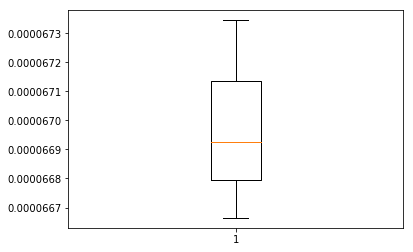

In [8]:
plt.boxplot(mses)
plt.savefig("mse_1_step_boxplot.png", dpi=200)

In [11]:
# MSE Over time
n_steps = len(full_losses[0])
for i in range(n_steps):
    mse_i = [full_losses[x][i] for x in range(len(PATHS))]
    mean_mse = np.mean(mse_i)
    std_mse = np.std(mse_i)
    print(f"Step {i + 1}: {format(mean_mse, precision=2)}±{format(std_mse, precision=1)}")

Step 1: 7.49e-06±3.9e-07
Step 2: 3.11e-05±1.6e-06
Step 3: 7.26e-05±3.5e-06
Step 4: 1.34e-04±6.2e-06
Step 5: 2.17e-04±9.6e-06
Step 6: 3.24e-04±1.4e-05
Step 7: 4.57e-04±1.9e-05
Step 8: 6.16e-04±2.4e-05
Step 9: 8.05e-04±3.e-05
Step 10: 1.02e-03±3.6e-05
Step 11: 1.28e-03±4.3e-05
Step 12: 1.56e-03±5.0e-05
Step 13: 1.88e-03±5.8e-05
Step 14: 2.23e-03±6.5e-05
Step 15: 2.62e-03±7.3e-05
Step 16: 3.05e-03±8.e-05
Step 17: 3.51e-03±8.7e-05
Step 18: 4.01e-03±9.3e-05
Step 19: 4.55e-03±9.9e-05
Step 20: 5.13e-03±1.0e-04


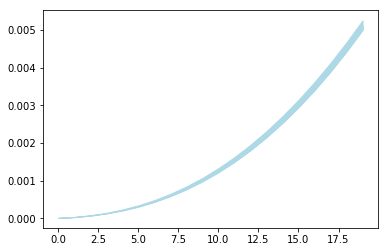

In [135]:
# Plot MSE over time
first = full_losses[0]
for i in range(1, len(full_losses)):
    plt.fill_between(np.arange(20), y1=first, y2=full_losses[i], color='lightblue')

plt.savefig("springs_mse_timesteps.png", dpi=200)

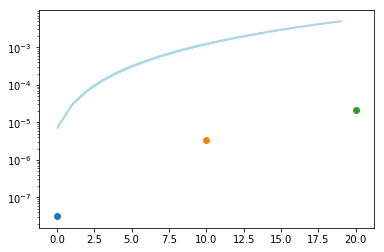

In [136]:
# Fill in Paper results
first = full_losses[0]
plt.yscale('log')
for i in range(1, len(full_losses)):
    plt.fill_between(np.arange(20), y1=first, y2=full_losses[i], color='lightblue')

paper_results = [(0, 3.12e-8), (10, 3.29e-6), (20, 2.13e-5)]
for (i, v) in paper_results:
    plt.scatter(i, v)
    
plt.savefig("paper_comparison.png", dpi=200)